<h1>Module Two: AI Foundations</h1>

<h2>Implementing a backpropagation artificial neural network (ANN) in Python</h2>

<h2>Section 2.3: An Extended Example</h2>

<h3>Today's Class</h3>

<h4>For Tuesday, February 21:</h4>
<ul>
    <li>Individual Exercise - Backpropagation ANN</li>
    <li>Team exercise - Maybe</li>
</ul>



<h3>The  Perceptron architecture:</h3>
<p>

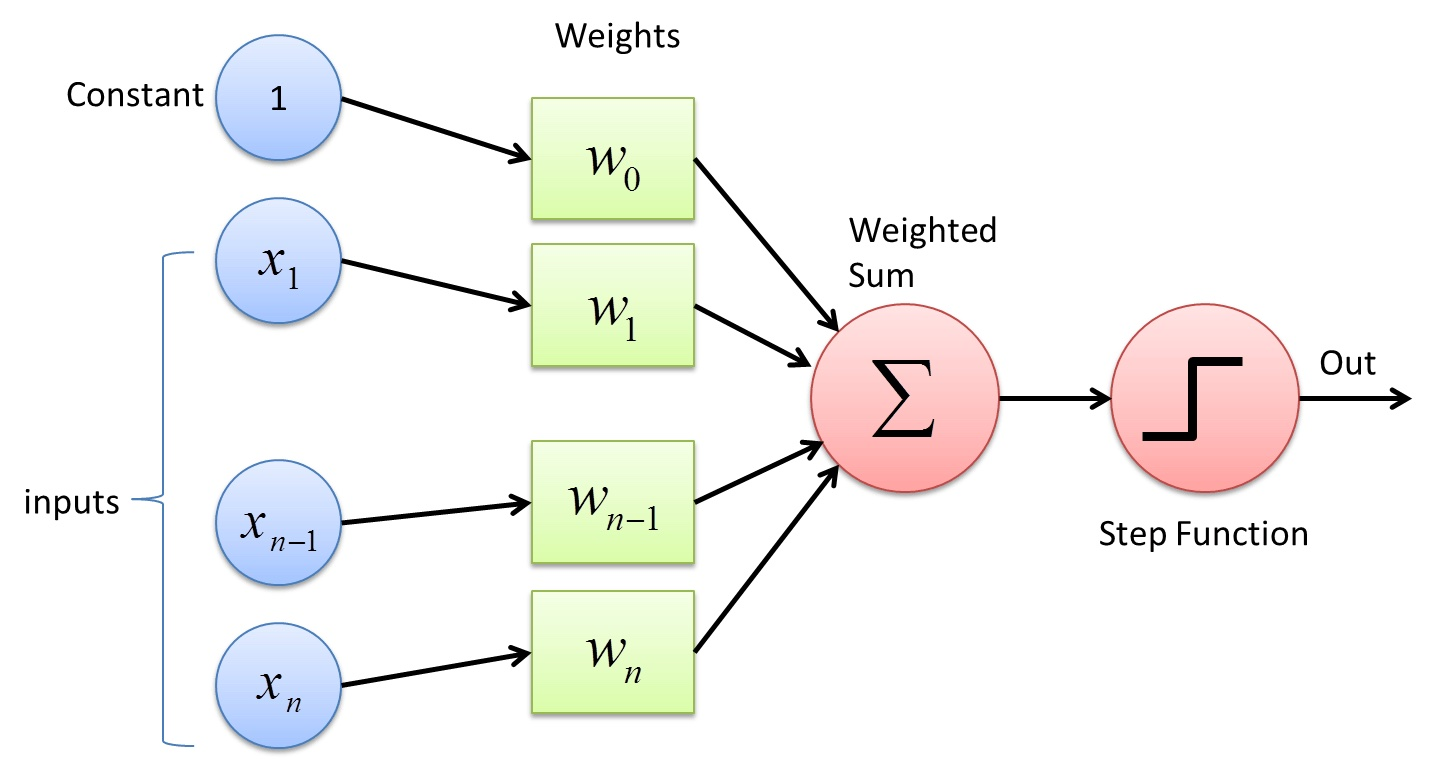

<h2>Perceptrons v. Error Backporpagation Artificial Neural Networks</h2>
<p>As we discussed earlier in the class, perceptron machine laerning networks were shown in the mid 1960s to have some significant shortcomings.
<p>In particular, there are classes of problems, called <em>non-linearly separable problems</em> that perceptrons cannot solve.
    <p>In the mid 1980s when researchers devised and popularized <em>Error backpropagation artificial neural networks</em> one of the big sellign points was that they could solve this class of problems.
        <p>We will look at this today.

<h3>Binary Logic Problems</h3>
<p> Stemming from many fields, but esecially digital and computer design engineering, there are several knds of simple circuits that make up computers:
<p>OR
<ul>
    <li>0 OR 0 => 0</li>
    <li>0 OR 1 => 1</li>
    <li>1 OR 0 => 1</li>
    <li>1 OR 1 => 1</li>
    </ul>
    "At least one of the inputs has to be on/true for the output to be true.
<p>
 <p>AND
<ul>
    <li>0 AND 0 => 0</li>
    <li>0 AND 1 => 0</li>
    <li>1 AND 0 => 0</li>
    <li>1 AND 1 => 1</li>
    </ul>
    "Both of the iputs has to be on/true for the output to be true.
<p>
<p>XOR
  <ul>
    <li>0 XOR 0 => 0</li>
    <li>0 XOR 1 => 1</li>
    <li>1 XOR 0 => 1</li>
    <li>1 XOR 1 => 0</li>
    </ul>
    "<em>Exactly</em> one of the inputs has to be on/true for the output to be true.
<p>
 

<p>Let's look into these problems, first with a Perceptron, and then with a backprop ANN.

<h3>A Perceptron for Binary Circuit Logic Problems</h3>
This Perceptron has been adopted from last time to attempt to solve binary circuit logic problems.

In [ ]:

import numpy as np
#
# 
#
# Take an objected-oriented approach to define the perceptron interface as a Python Class
# It has a fit method a predict method
# Add an underscore to attributes that are not being created upon the initialization of the object but by calling the object's other methods
# In practice, samples need to be shuffled at each epoch, which will be implemented in the AdalineSGD
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    initialWeightValue : float
        The initial value of the weights in the network
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Number of epochs (passes) over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, initialWeightValue = 0.0, eta=0.01, n_iter=10):
        self.initialWeightValue = initialWeightValue
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        # initialize weights as an array of size 1 + number of features, all zeroes.
        # Initialize errors as empty list
        #self.w_ = np.zeros(1 + X.shape[1])
        self.w_ = np.full(1 + X.shape[1], self.initialWeightValue)
        print(f'\tInitial weights {self.w_}')
        self.errors_ = []
        
        for epoch in range(self.n_iter):
            errors = 0
            # iterate samples one by one and update the weights
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                # Update the bias
                self.w_[0] += update
                #Update the weights
                self.w_[1:] += update * xi
                # If the erroris non-zero, update the number of errors by one 
                errors += int(update != 0.0)
                # print(f'Target: {target}\tPrediction: {self.predict(xi)}')
            # Update the number of errors in this epoch
            self.errors_.append(errors)
            
            print(f"\nEpoch: {epoch}")
            print("The cumulative errors: ", self.errors_)
            print(f'\tCurrent weights: {self.w_}')
        return self
    
    def net_input(self, X):
        """Calculate net input before activation"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [ ]:
import pandas as pd

# OR
data_OR = [ [0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1] ]
df_OR = pd.DataFrame(data_OR, columns=["A", "B", "Output"])

# Show the dataset
df_OR

In [ ]:
# AND
data_AND = [ [0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1] ]
df_AND = pd.DataFrame(data_AND, columns=["A", "B", "Output"])

# Show the dataset
df_AND

In [ ]:
# XOR
data_XOR = [ [0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0] ]
df_XOR = pd.DataFrame(data_XOR, columns=["A", "B", "Output"])

# Show the dataset
df_XOR

Plot the data set using two of the lengths (0 and 2 above) to get an idea of how they cluster

In [ ]:
# plot the logic function data using scatter plot
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Get the outputs
y = df_OR["Output"].to_numpy() # For OR
#y = df_AND["Output"].to_numpy() # For AND
#y = df_XOR["Output"].to_numpy() # For XOR

# select two features: sepal length and petal length for visualization
X = df_OR[["A", "B"]].to_numpy() # For OR
#X = df_AND[["A", "B"]].to_numpy() # For AND
#X = df_XOR[["A", "B"]].to_numpy() # For XOR

print("X: ", X)
print()
print("y", y)


In [ ]:
# plot scatter plot
#
# For OR
plt.scatter(X[:1, 0], X[:1, 1], color='r', marker='o', label='false')
plt.scatter(X[1:4, 0], X[1:4, 1], color='b', marker='+', label='true')
# For AND
#plt.scatter(X[:3, 0], X[:3, 1], color='r', marker='o', label='false')
#plt.scatter(X[3:4, 0], X[3:4, 1], color='b', marker='+', label='true')
# For XOR
# ???

plt.xlabel('A')
plt.ylabel('B')
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

### Train the perceptron model

In [ ]:
# Create a perceptron classifer object and train the classifier with iris data
ppn = Perceptron(initialWeightValue = 0.0, eta=0.02, n_iter=10)
ppn.fit(X, y)

# plot the error for each epoch to check for convergence
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Create a function for plotting decision regions

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

The code below works, but gives a warning message.
<p>This is one of the joys of working with packages. You frequently have to look up the package to see what is going on that gives you a warning, error, etc.
<p>Also, Jupyter notebooks aren't the greatest debugging environment.

In [ ]:
plot_decision_regions(X, y, ppn)


<h3>Perceptron exercises</h3>
<ul>
    <li>Run the XOR examples</li>
    <li>Try different learning rates, number of epochs, etc.</li>
    <li>Modify the network to run the OR and AND problems.</li>
    <ul>
        <li>Does it work?</li>
        <li>What happens when you try different values of the parameters?</li>
    <ul>
</ul>

<h2>Error Backpropagation Artificial Neural Networks</h2>

We talked about error backpropagation artificial neural networks.
<p>Basically, they differ from Perceptrons in having
    <ul>
        <li>One or more hidden layers</li>
        <li>Use non-linear activation functions on hte sums calculated at the hidden and output layers.</li>
        </ul>

<h3>Error Backprop Architecture</h3>

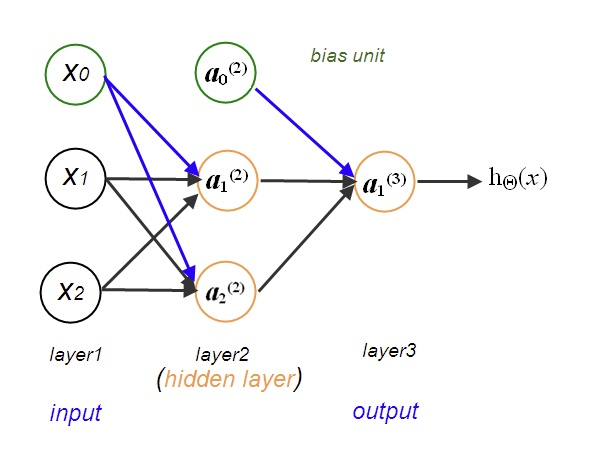

<p>The inputs at the hidden and output layers can be arbitrary large (and either positive or negative).
<p>We would like to <em>normalize</em> themback into the range between 0 and 1 (0, 1).
    <p>We do this with various <em>squashing functions</em>.
        <p>In addition, this squashing adds a non-linearlity that allows the machine learning to work.

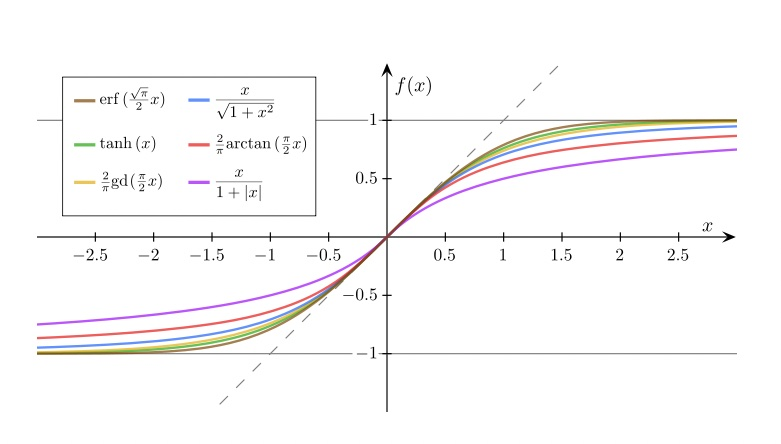

The figure shows various logistic/squashing funtions that you can use in backprop nets.

<p>Here were have a backprop net for binary logic circuits.

In [ ]:
#
# The example and code adapted from:  
# https://www.bogotobogo.com/python/python_Neural_Networks_Backpropagation_for_XOR_using_one_hidden_layer.php
#
import numpy as np

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2


class NeuralNetwork:

    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_prime

        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

        # Initialize the error recording
        self.misclassifications = []
        self.squaredErrors = []

        # Constants
        self.numEpochs = 1000
        self.learningRate = 0.2
        self.errorThreshold = 0.4

    def predict(self, x):

        # a = np.concatenate((np.ones(1).T, np.array(x)), axis=1)
        # print("predict: ", np.array(x), np.array(x)[1])
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        # a = np.array(x)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a
    

    def fit(self, X, y, learning_rate=0.2, epochs=100):
        # print(f"Epochs: {self.numEpochs}\tLearning Rate: {self.learningRate}\tError threshold {self.errorThreshold}")
        
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X_orig = X
        X = np.concatenate((ones.T, X), axis=1)
         
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]
            # print(f"i: {i}\tX[i]: {X[i]}\ta: {a}")

            # Initialze the errors for this epoch
            epochMisclassifications = 0
            epochSquaredError = 0.0
            #
            # print(f"\tepochSquaredError: {epochSquaredError}")


            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]

            # Update the error data
            if abs(error) > self.errorThreshold:
                epochMisclassifications += 1
            # print(f"y[i]: {y[i]}\ta[-1][0]: {a[-1][0]}")
            # print(f"Calculated error: {(y[i] - a[-1][0])**2}")
            epochSquaredError += ((y[i] - a[-1][0])**2)
            # print(f"\tepochSquaredError: {epochSquaredError}")

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            # Adjust the persistent error measures
            # print(f"epochMisclassifications: {epochMisclassifications}\tepochSquaredError: {epochSquaredError}")
            self.misclassifications.append(epochMisclassifications)
            self.squaredErrors.append(epochSquaredError)
            
            # Every 100 epochs print out how the ANN is doing
            if k % 100 == 0:
                print(f"\nEpochs: {k}")
                epoch_error = 0.0
                for index in range(0,len(X_orig)):
                    yprime = nn.predict(X_orig[index])
                    print(f"{X_orig[index]}\t{y[index]}\t{yprime}\t({(y[index]-yprime)**2})")
                    epoch_error = epoch_error + (y[index]-yprime)**2
                # print(f"Misclassifications: {self.misclassifications}\tSquared Errors: {self.squaredErrors}")
                print(f"Epoch: {k}\tError: {epoch_error}")
                print()
            elif k % 10 == 0:
                # Every 10 epochs calculate and print the error
                epoch_error = 0.0
                for index in range(0,len(X_orig)):
                    yprime = nn.predict(X_orig[index])
                    epoch_error = epoch_error + (y[index]-yprime)**2
                print(f"Epoch: {k}\tError: {epoch_error}\tMisclassifications: {epochMisclassifications}")



if __name__ == '__main__':

    # Define the ANN architecture - two input units, two hidden units in one layer, and one output unit
    nn = NeuralNetwork([2,2,1])

    # X and y data for the XOR (exclusive OR problem)
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
    
    # Train the model
    nn.fit(X, y)
    print()
    epoch_error = 0
    for index in range(0,len(X)):
        yprime = nn.predict(X[index])
        print(f"{X[index]}\t{y[index]}\t{yprime}\t({(y[index]-yprime)**2})")
        epoch_error = epoch_error + (y[index]-yprime)**2
    print("Error: ", epoch_error)
    print(f"X: {X}\ty: {y}")


In [ ]:
# plot the number of errors for each epoch to check for convergence
plt.plot(range(1, len(nn.misclassifications)+1), nn.misclassifications)
plt.xlabel('Epoch')
plt.ylabel('Number of misclassifications')
plt.show()

In [ ]:
# plot the sum of squared errors for each epoch to check for convergence
plt.plot(range(1, len(nn.squaredErrors)+1), nn.squaredErrors)
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Errors')
plt.show()

<h3>Backprop net exercises</h3>
<ul>
    <li>Run the XOR examples</li>
    <li>Try different learning rates, number of epochs, etc.</li>
    <li>Modify the network to run the OR and AND problems.</li>
    <ul>
        <li>Does it work?</li>
        <li>What happens when you try different values of the parameters?</li>
    <ul>
</ul>

<p>I don't know if we'll (still) get to the next exercise today.

<h2>Team Exercise</h2>

<p>Elaborating on the exercise from last time:

<blockquote>I want your team to create a system to detect how many cars cross a local bridge. The system must recognize a car, and which direction it's going. If there is a car detected, the output of the ML system is combined with a date stamp (e.g. something to the effect of "A car was detected traveling west-bound at 1:34 PM on Wednesday, Feburuary 22, 2023.") and this is sent to a database of some kind.</blockquote>
   
<p>For this exercise, I would like your team to think abot hthe following question:
<p>Based on the people in yourteam today,
    <ul>
        <li>What skill sets does your team have to complete a machine learning project (cf. wahtthe author talks about in chapter eight)? What are those skills?</li>
        <li>What skill sets do you not have on your team?</li>
        </ul>

<p>Please submit on Brightspace:
        <ul>
    <li>The names of the team members present.</li>
    <li>Your answers to the above.</li>
    <ul>
    

<h3>Preparing for Upcoming Classes</h3>

<h4>For Tuesday, February 21:</h4>
<ul>
    <li>Exercises based upon our readings to date.</li>
</ul>

<h4>For Thursday, February 23:</h4>
<p>Starting Module Three: Data
<ul>
    <li>Read Chapter Two in the Text</li>
    <li>There will be a short quiz on Chapter Two.</li>
        <ul><li>(Individual and team)</li></ul>
    <li>And exercises.</li>
</ul>

<h4>For Tuesday, February 28:</h4>
<ul>
    <li>Exercises based upon our readings to date.</li>
</ul>

